In [1]:
import numpy as np
import simtk.unit as unit
import matplotlib.pyplot as plt
import openmolecularsystems as oms

# Predicción de la termodinámica desde la mecánica estadística

En el argot de la mecánica estadística, los procesos estocásticos, y la simulación de dinámica molecular, hablamos de termodinámica cuando nos referimos al conjunto de observables que no depende del tiempo. Por ejemplo, la distancia promedio entre dos átomos, la probabilidad de que se forme un puente de hidrógeno entre una cadena lateral y una molécula de agua o la constante de disociación de un ligando y un receptor. No quiere decir que dicha distancia, dicho puente de hidrógeno o dicho complejo receptor-ligando, no vaya a variar con el tiempo. De hecho lo hacen. Pero los observables a los que nos estamos refiriendo tienen un valor no relacionado con el tiempo. De hecho si el universo en el que medimos tiene una población lo suficentemente grande de sistemas (infinito, en teoría), podemos realizar una medida instantaneamente y obtener el valor de estos observables de la medida tomada a toda la población. Ésta sera igual que la que obtendremos de observar un único sistema durante un tiempo suficientemente largo (infinito, en teoría). Sabemos por lo tanto que la capacidad de medir estos observables no depende de cuantas veces midamos a durante cuanto tiempo. La precisión o la fiabilidad del valor obtenido si depende, pero la capacidad de medirlos no. Un ejemplo de observables que dependen del tiempo serían el tiempo de vida media del puente de hidrógeno, la constante de difusión de la molécula de agua o la constante cinética de formación o ruptura del complejo recetor-ligando. Cuando nos referimos a estos últimos observables estamos hablando de cinética, no de termodinámica. Y en este caso la capacidad de medirlos si depende de cuando medimos y durante cuanto tiempo.

Para entender a continuación qué tiene que ver la termodinámica con el valor esperado de una distancia entre átomos tomemos como ejemplo nuestro doble pozo con los parámetros usados en las unidades anteriores.

\begin{equation}
V(x,y,z)=E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x + \frac{1}{2}k\left( y^2 + z^2 \right)
\end{equation}

In [2]:
# Sistema
mass = 35.453 * unit.amu

# Potential externo
Eo = 3.0 * unit.kilocalories_per_mole
a = 0.5 * unit.nanometers
b = 0.5 * unit.kilocalories_per_mole
k = 1.0*unit.kilocalories_per_mole/unit.angstrom**2

# Estado termodinámico
temperature=300.0*unit.kelvin

In [3]:
osystem = oms.DoubleWell(mass=mass, Eo=Eo, a=a, b=b, k=k)

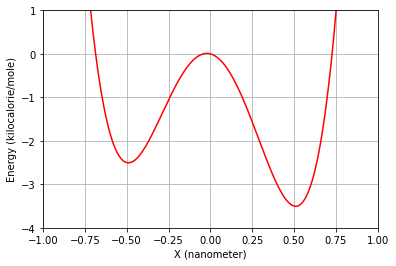

In [4]:
xyz_serie = np.zeros([200,3]) * unit.nanometers
xyz_serie[:,0] = np.linspace(-1.0, 1.0, num=200) * unit.nanometers

potential = osystem.evaluate_potential(xyz_serie)

plt.plot(xyz_serie[:,0], potential, 'r-')
plt.ylim(-4,1)
plt.xlim(-1,1)
plt.grid()
plt.xlabel("X ({})".format(unit.nanometers))
plt.ylabel("Energy ({})".format(unit.kilocalories_per_mole))
plt.show()

Se puede demostrar que la probabilidad de que un sistema molecular visite un estado de su espacio de fases -el espacio de posiciones y velocidades-, determinado por las posiciones y velocidades de todos sus átomos, está pesada por -es proporcional a- el peso de Boltzmann o función de partición:

\begin{equation}
z(\vec{r},\vec{v}) = e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})}
\end{equation}

Donde $K_{B}$ es una constante -la constante de Boltzmann-, $T$ es la temperatura, y $U(\vec{r},\vec{v})$ es la energía total del sistema en dicho estado (la energía expresada por el Hamiltoniano):

\begin{equation}
U(\vec{r},\vec{v}) = V(\vec{r}) + T(\vec{v})
\end{equation}

donde el término de la energía potencial es

\begin{equation}
V(\vec{r}) = E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x + \frac{1}{2}k\left( y^2 + z^2 \right)
\end{equation}

y el término de la energía cinética es

\begin{equation}
T(\vec{v}) = \frac{1}{2} m \left( v_{x}^2 + v_{y}^2 + v_{z}^2 \right)
\end{equation}



## ¿Qué es un estado?

Un estado es un punto o una región del espacio de coordenadas y velocidades del sistema. Cuando hablamos de un punto, solemos referirnos a ese estado como "microestado". Y cuando hablamos de una región solemos referirnos a ese fragmento del espacio de fases como "estado" o "macroestado". Y ya que estamos, la gran mayoría de ocasiones en las que manejarás estos términos será sin especificar las velocidades. Darás por entendido que quieres conocer ciertas circunstancias del sistema dadas por sus coordenadas, sin importar qué velocidades lleven sus átomos. Así que si nos dan igual las velocidades, si como se dice técnicamente vamos a integrar fuera el espacio de velocidades, estaremos circunscribiendonos no al espacio de fases (de coordenadas y velocidades) sino al espacio conformacional (de coordenadas).

Veamos ejemplos de estados cuando hablamos del doble pozo unidimensional. En primer lugar un microestado del espacio de fases:

\begin{equation}
\{\vec{r}=(0.0, 0.0, 0.0)\: \rm{nm};\: \vec{v}=(1.0, 0.0, 0.0)\: \rm{nm/ps}\}
\end{equation}

Ahora un microestado definido únicamente en el espacio conformacional o de coordenadas:

\begin{equation}
\{\vec{r}=(-0.2, -0.2, -0.2)\: \rm{nm};\: -\infty<v_{i}<\infty \: \rm{nm/ps} \:\rm{donde}\: i=x,y,z\}
\end{equation}

Ahora un estado definido como una región del espacio de coordenadas:

\begin{equation}
\{0 \leq x<0.5\: \rm{nm}, -\infty<i<\infty \: \rm{nm} \:\rm{donde}\: i=y,z;\: -\infty<v_{j}<\infty \: \rm{nm/ps} \:\rm{donde}\: j=x,y,z\}
\end{equation}

## ¿Cómo calculamos la probabilidad absoluta de un estado?

Y ahora calculemos la probabilidad de cada uno de los anteriores estados. ¿Cómo calculamos una probabilidad si conocemos su peso? Pongamos un ejemplo sencillo. Imagina que tiramos un dado de seis caras 100 veces para inferir el peso de cada número. Esta es la frecuencia obtenida para cada cara:

|lado | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
|frequencia | 16 | 14 | 18 | 12 | 23 | 17 |

Para conocer la probabilidad de que el dado caiga mostrando un cierto número $n$ dividimos el peso de dicho número $w(n)$ para el peso total de todos los números. Y si pensamos que la frecuencia $f$ de aparición de cada lado es proporcional al peso, la probabilidad de $n$ es:

\begin{equation}
P(n) = \frac{w(n)}{\sum_{i} w(i)} = \frac{f_n}{\sum_{i} f_i}
\end{equation}

Así por ejemplo la probabilidad del lado $3$ estimamos de nuestro experimento que es $18.0/100.0$. A esta probabilidad la llamamos probabilidad absoluta.

No te resulta extraño entonces que necesitemos conocer la suma de los pesos de todos los estados posibles de nuestro sistema molecular para determinar la probabilidad de aparición de un determinado estado:

\begin{equation}
P(\vec{r}, \vec{v}) = \frac{z(\vec{r}, \vec{v})}{Z}
\end{equation}

donde la función de partición o peso de Boltzmann del estado es

\begin{equation}
z(\vec{r}, \vec{v}) = e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})}
\end{equation}

y la función de partición total

\begin{equation}
Z = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})} d\vec{r} d\vec{v}
\end{equation}

Vamos a aterrizar sobre nuestro caso de doble pozo la aplicación de estas ecuaciones. Veamos en primer lugar la probabilidad de que la partícula se encuentre en $\vec{r}=(0.0, 0.0, 0.0)$ con velocidad $\vec{v}=(1.0, 0.0, 0.0)$. En primer lugar calculemos la función de partición total del sistema.

\begin{equation}
Z = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})} d\vec{r} d\vec{v}
= \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} (V(\vec{r})+T(\vec{v}))} d\vec{r} d\vec{v}
= \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V(\vec{r})} d\vec{r} \cdot \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T(\vec{v})} d\vec{v}
\end{equation}

La función de partición total del sistema puede, dado que la parte del potencial no depende de las velocidades, puede entonces descomponerse en un producto de dos integrales que llamaremos $Z_{V}$ y $Z_{T}$:

\begin{equation}
Z = Z_{V}Z_{T}
\end{equation}

con

\begin{align}
Z_{V} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V(\vec{r})} d\vec{r}\\ \\
Z_{T} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T(\vec{v})} d\vec{v}
\end{align}

Vamos en primer lugar a resolver $Z_{T}$:

\begin{equation}
Z_{T} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T(\vec{v})} d\vec{v} =
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{x}^{2}} dv_{x}
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{y}^{2}} dv_{y}
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{z}^{2}} dv_{z}
\end{equation}

Ahora hemos puesto $Z_{T}$ como producto de tres funciones de partición según $v_{x}$, $v_{y}$ o $v_{z}$:

\begin{equation}
Z_{T} = Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}}
\end{equation}

donde

\begin{equation}
Z_{T_{v_{i}}} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} m v_{i}^{2}} dv_{i} \; \; \rm{con} \; i=x, y, z 
\end{equation}

Cada una de las integrales para $v_{x}$, $v_{y}$ y $v_{z}$ son solubles analíticamente. De hecho se trata de una integral muy popular conocida por los nombres integral Gaussiana o de Euler–Poisson:

\begin{equation}
\int_{-\infty}^{\infty} e^{-ax^{2}} dx = \sqrt{\frac{\pi}{a}}
\end{equation}

Así que ya tenemos valor para $Z_{T}$:

\begin{equation}
Z_{T} = \left(\frac{2\pi K_{B}T}{m}\right)^{3/2}
\end{equation}

Vamos ahora con $Z_{V}$, de nuevo podemos abordar su cálculo de la misma manera, como producto de tres términos:

\begin{align}
Z_{V} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V(\vec{r})} d\vec{r} = Z_{V_{x}} Z_{V_{y}} Z_{V_{z}}
\end{align}

donde

\begin{align}
Z_{V_{x}} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} E_{0}\left[ \left(\frac{x}{a}\right)^4 -2\left(\frac{x}{a}\right)^2 \right]-\frac{b}{a}x} d\vec{x}
\end{align}

y

\begin{equation}
Z_{V_{i}} = \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} \frac{1}{2} k i^{2}} di \; \; \rm{con} \; i=y, z 
\end{equation}

Vemos que las funciones de partición $Z_{V_{y}}$ y $Z_{V_{z}}$ corresponden a los potenciales armónicos en los ejes $Y$ y $Z$, y por lo tanto son integrales Gaussianas con solución analítica:

\begin{equation}
Z_{V_{y}} = Z_{V_{z}} = \sqrt{\frac{2\pi K_{B}T}{k}}
\end{equation}

Ya casi podemos resolver:

\begin{equation}
Z = Z_{V_{x}} Z_{V_{y}} Z_{V_{z}} Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}} =
Z_{V_{x}} \left(\frac{2\pi K_{B}T}{k}\right) \left(\frac{2\pi K_{B}T}{m}\right)^{3/2}
\end{equation}

Sólo nos resta obtener el valor de $Z_{V_{x}}$, el problema es que no tiene una resolución analítica sencilla, así que la resolveremos numéricamente.

In [5]:
unit.constants.BOLTZMANN_CONSTANT_kB

Quantity(value=1.380649e-23, unit=joule/kelvin)

In [6]:
Eo = 3.0 * unit.kilocalories_per_mole
a = 0.5 * unit.nanometers
b = 0.5 * unit.kilocalories_per_mole
k = 1.0*unit.kilocalories_per_mole/unit.angstrom**2
KbT = unit.BOLTZMANN_CONSTANT_kB * unit.AVOGADRO_CONSTANT_NA * 300.0*unit.kelvin

def zVx (x):
    
    global Eo, a, b, k, KbT
    
    x_aux = x/a
    Vx =  Eo * (x_aux**4 - 2*x_aux**2) - b*x_aux

    return np.exp(-Vx/KbT)
    
    
def integral_numerica_1D (f, lim_inf, lim_sup, n_bins):
    
    delta_x = (lim_sup - lim_inf)/n_bins
    
    x = lim_inf

    for ii in range(1,n_bins):
        try:
            output += f(x)*delta_x
        except:
            output = f(x)*delta_x
        x += delta_x
    
    return output

In [7]:
ZVx = integral_numerica_1D(zVx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)

In [8]:
ZVx

Quantity(value=86.01243401443949, unit=nanometer)

Nota: Explicar por qué tiene dimensiones y por qué tomo limites -1 y 1.

Así que ya podemos determinar el valor "de la suma de pesos de todos los estados posibles", el valor de la función de partición total:

In [9]:
ZVy = np.sqrt(2.0*np.pi*KbT/k)
ZVz = ZVy
ZTvx = np.sqrt(2.0*np.pi*KbT/mass)
ZTvy = ZTvx
ZTvz = ZTvx

In [10]:
Z = ZVx*ZVy*ZVz*ZTvx*ZTvy*ZTvz

Explicar de nuevo el tema de las dimensiones.

Ya podríamos calcular la probabilidad del estado $\begin{equation}
\{\vec{r}=(0.0, 0.0, 0.0)\: \rm{nm};\: \vec{v}=(1.0, 0.0, 0.0)\: \rm{nm/ps}\}
\end{equation}$ como:

\begin{equation}
P(\vec{r}=(0.0, 0.0, 0.0)\: \rm{nm};\: \vec{v}=(1.0, 0.0, 0.0)\: \rm{nm/ps}) = \frac{1}{Z} e^{-\frac{m}{2K_{B}T}} \: dx\: dy\: dz\: dv_{x}\: dv_{y}\: dv_{z}
\end{equation}

Nota que hemos añadido el elemento de volumen infinitesimal $dx\: dy\: dz\: dv_{x}\: dv_{y}\: dv_{z}$. La probabilidad de encontrar al sistema en un punto infinitesimal es por definición cero. Así que, para poder converte de que la mecánica estadística funciona y podemos comparar las probabilidades con los resultados de nuestra dinámica de Langevin, o de que la dinámica de Langevin funciona y su resultado es comparable con lo calculado mediante mecánica estadística. Calculemos la probabilidad de que nuestra partícula se encuentra en lo que en las unidades anteriores hemos definido como estado "on" ($x\leq x_{b}$ donde $x_{b}$ es la coordenada de la barrera en el eje $X$):

\begin{align}
P(x\leq x_{b}) = & \frac{1}{Z} \int_{-\infty}^{x_{b}} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}
\int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}
e^{-\frac{1}{K_{B}T}(V_{x}(x)+V_{y}(y)+V_{z}(z)+T_{v_{x}}(v_{x})+T_{v_{y}}(v_{y})+T_{v_{z}}(v_{z}))} \: dx\: dy\: dz\: dv_{x}\: dv_{y}\: dv_{z}
\\
= &  \frac{1}{Z} \int_{-\infty}^{x_{b}} e^{-\frac{1}{K_{B}T} V_{x}(x)} \: dx\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V_{y}(y)} \: dy\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V_{z}(z)} \: dz\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T_{v_{x}}} \: dv_{x}\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T_{v_{y}}} \: dv_{y}\:
\int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} T_{v_{z}}} \: dv_{z}\: 
\\
= &  \frac{Z_{V_{y}} Z_{V_{z}} Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}}}{Z_{V_{x}} Z_{V_{y}} Z_{V_{z}} Z_{T_{v_{x}}} Z_{T_{v_{y}}} Z_{T_{v_{z}}}} \int_{-\infty}^{x_{b}} e^{-\frac{1}{K_{B}T} V_{x}(x)} \: dx 
\\
= &  \frac{1}{Z_{V_{x}}} \int_{-\infty}^{x_{b}} e^{-\frac{1}{K_{B}T} V_{x}(x)} \: dx
\end{align}

Antes de seguir, un comentario. Como ves, cuando la exponencial factoriza como producto de una exponencial que depende únicamente de $x$, otra que depende únicamente de $y$ y otra de $z$, los sucedido en $x$ no depende de lo que sucede en $y$ y en $z$. Dicho de otra manera, cuando el potencial tiene sumandos que dependen de $x$, otros de $y$ y otros de $z$; cuando no aparecen términos cruzados como $xy$ o $xz$, la probabilidad de un estado únicamente definido en la $X$ no depende de dónde esté la partícula en el plano $YZ$. Es por eso que en estas unidades estamos simulando una partícula en tres dimensiones y recurrentemente sólo analizamos lo que sucede en $X$. Podríamos hacer una simulación unidimensional, sólo del doble pozo en $X$, y el resultado sería exactamente el mismo. 

Veamos ahora la probabilidad de que la partícula se encuentre en el estado "on":

In [11]:
xb = osystem.get_coordinates_maximum()[0][0]

In [12]:
xb

Quantity(value=-0.020869692013621984, unit=nanometer)

In [15]:
zVx_estado = integral_numerica_1D(zVx, -1.0*unit.nanometer, xb, 1000)
ZVx = integral_numerica_1D(zVx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)
Pe_on_teorico = zVx_estado/ZVx

In [16]:
print(Pe_on_teorico)

0.168776403296876


Veamos como efectivamente el valor de $P^{e}_{on}$ que calculamos de una simulación lo suficientemente larga converge al valor obtenido mediante mecánica estadística. Igual que hicimos en la unidad anterior:

In [17]:
initial_positions = np.zeros([1,3]) * unit.nanometers

time=1000*unit.nanoseconds
saving_timestep=10.0*unit.picoseconds
integration_timestep=0.1*unit.picoseconds
friction=1.0/unit.picoseconds

reporter = oms.tools.md.langevin_NVT(osystem, time=time, saving_timestep=saving_timestep,
                                     integration_timestep=integration_timestep,
                                     temperature=temperature, friction=friction,
                                     initial_coordinates=initial_positions,
                                     platform_name='CUDA')

10000000it [05:24, 30843.38it/s]       


In [18]:
traj_x = reporter['coordinates'][:,0,0]
M = traj_x.shape[0]
traj_is_on = (traj_x<=xb)

Pe_on_in_time = np.zeros([M])

for frame_index in range(M):
    m_on_aux = np.sum(traj_is_on[:frame_index])
    Pe_on_in_time[frame_index] = m_on_aux/(frame_index+1)

Pe_off_in_time = 1.0 - Pe_on_in_time

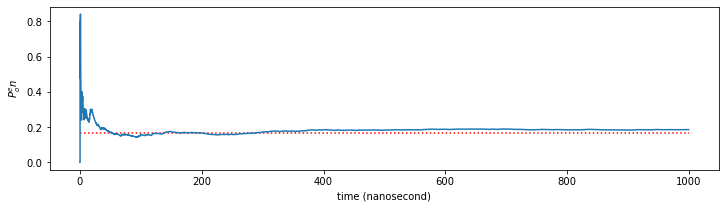

In [19]:
plt.figure(figsize=(12,3))
plt.plot(reporter['time'].in_units_of(unit.nanoseconds), Pe_on_in_time)
plt.hlines(Pe_on_teorico,0,1000, linestyle=':', color='red')
plt.ylabel('$P^e_on$'.format(reporter['coordinates'].unit))
plt.xlabel('time ({})'.format(unit.nanoseconds))
plt.show()

¿Te hubieras quedado con la simulación de 100 ns?

De hecho... podemos corroborar que la densidad de probabilidad sobre sobre el eje $X$ calculada teóricamente y la recogida de la simulación de la dinámica de Langevin son las mismas:

In [20]:
Z_Vx = integral_numerica_1D(zVx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)
x_serie = np.linspace(-1.0, 1.0 , 1000) * unit.nanometer
zVx_serie = zVx(x_serie)
Px_serie = zVx_serie/Z_Vx

In [21]:
def occupation_probability_density_1d(traj_x, x_range, n_bins):
    delta_x = (x_range[1]-x_range[0])/n_bins
    frequency = np.zeros(n_bins, dtype=int)
    for x in traj_x:
        bin_visited = int((x-x_range[0])/delta_x)
        frequency[bin_visited]+=1
    x_bins_centers = (x_range[0]+0.5*delta_x) + delta_x*np.arange(n_bins)
    bins_probability_density = (1.0/delta_x)*(frequency/frequency.sum())
    return x_bins_centers, bins_probability_density

In [22]:
traj_x = reporter['coordinates'][:,0,0]
x_center_bin, px = occupation_probability_density_1d(traj_x, [-1,1]*unit.nanometers, 100)

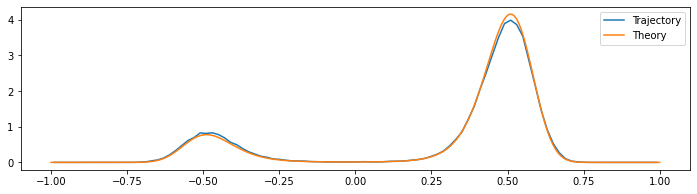

In [23]:
plt.figure(figsize=[12,3])
plt.plot(x_center_bin, px, label='Trajectory')
plt.plot(x_serie, Px_serie, label='Theory')
plt.legend()
plt.show()

Prueba a calcular la densidad de probabilidad de ocupación con un fragmento de trayectoria de 10 ns, 50, ns, 100 ns y 500 ns. ¿Ves cómo la distribución va alcanzando la solución estacionaria? Necesitas un fragmento lo suficientemente largo para describir cómo se comporta el sistema en equilibrio. Y estamos hablando de la descripción, no del sistema. Prueba por ejemplo a calcular de la trayectoria el valor de $Pe_on$ con los primeros 200 ns, y con los siguientes, y con los siguientes de los siguientes. ¿Ves que siempre tienes un fragmento de entre 50 y 100 ns hasta que tu medida comienza ligeramente a converger?

## ¿Cómo calculamos la probabilidad relativa entre dos estados?

Volviendo al ejemplo del dado y la tabla de frecuencias de aparición de cada lado despues de 100 tiradas. ¿cuán más probable es el $2$ que el $3$? En este caso nos estamos preguntando por la probabilidad relativa del $2$ con respecto al $3$. Para calcularla podríamos calcular las probabilidades $P_{2}$ y $P_{3}$ para resolver $P_{2}/P_{3}$. Bueno, nadie va a decir que no está bien. Pero si haces el cálculo de esta manera estás haciendo trabajo innecesario... y puede que no siempre lo puedas resolver así. ¿Qué sucede si tiraste el dado 200 veces pero no anotaste la frecuencia del 1 ni la del 6? Obviamente no puedes calcular la probabilidad absoluta $P_{2}$ del 2, tampoco la del 3, pero si puedes calcular la probabilidad relativa entre los dos.

|lado | 1 | 2 | 3 | 4 | 5 | 6 |
| -- | -- | -- | -- | -- | -- | -- |
|frequencia | ... | 29 | 34 | 31 | 26 | ... |

La probabilidad relativa no depende de la suma de los pesos de todos los estados posibles:

\begin{equation}
\frac{P(p)}{P(q)} = \frac{\frac{w(p)}{\sum_{i} w(i)}}{\frac{w(q)}{\sum_{i} w(i)}} = \frac{w(p)}{w(q)}
\end{equation}

donde de nuevo $w(i)$ es el peso del estado $i$ que consideraremos, para inferir la probabilidad relativa del experimento, proporcional a la frecuencia de aparación de $i$. Así que según nuestra tabla $P_{2}/P_{3}=29/34=0.853$.

Este ligero detalle, que puede parecerte ahora irrelevante, de que para calcular la probabilidad relativa entre dos estados no sea necesario calcular la función de partición total, resulta de una importancia enorme cuando en el diseño racional de ligandos. Se puede demostrar por ejemplo que para ordenar un conjunto de ligandos según su probabilidad absoluta de asociación, no es necesario calcular las funciones de partición total de dichos ligandos. Más adelante veremos cómo podemos, mediante un conjunto de técnicas llamadas 'alchemistry' guiarnos por las probabilidades relativas (mucho más baratas de calcular que las absolutas). Pero sin avanzar tanto, si podemos por ejemplo ilustrar la relevancia de no tener que calcular la función de partición total para estimar una probabilidad relativa. Supongamos que un mismo ligando se une en una zona específica de tres maneras distintas, con tres poses de unión. ¿Qué pose es más probable? No es necesario calcular la función de partición de toda la región conformacional de ligando disociado para poder contar con la función de partición total. Este esfuerzo es, además de muy costoso, innecesario. Basta con conocer la función de partición de cada una de las poses para conocer cuan probable es una pose más que la otra.

## ¿Y qué es la energía libre y cúal es su relación con la probabilidad?

La mecánica estadística demuestra que la probabilidad de un estado, de un evento, de un sistema físico es función de magnitudes termodinámicas. Y conocemos la forma de dicha expresión es:

\begin{equation}
P_{i} = \frac{1}{Z} e^{-\frac{1}{K_{B}T} F_{i}}
\end{equation}

Donde $1/Z$ ya vimos que es una constante y el valor F_{i} es la variable que engloba toda la termodinámica del sistema en el estado $i$ que determina el peso de la probabilidad dicho estado.

En el caso de que estemos hablando de un microestado, esta función $F_{i}$ coincide con el valor del hamiltoniano en dicho microstado. Si no definimos el microstado en espacio de fases, sino en el espacio de coordenadas, no estamos hablando de otra cosa que de la energía potencial:

\begin{equation}
P_{\vec{r}} = \frac{1}{Z} \iiint_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})} d\vec{v} =
\frac{Z_{T}}{Z} e^{-\frac{1}{K_{B}T} V(\vec{r})} = \frac{1}{Z_{V}} e^{-\frac{1}{K_{B}T} V(\vec{r})} = e^{-\frac{1}{K_{B}T} F(\vec{r})}
\end{equation}

Ahora bien, es muy muy muy poco común poder hacer medidas en un laboratorio sobre microestados. Lo normal es que las medidas o los observables los definamos sobre estados (macro-estados). Por ejemplo... la probabilidad absoluta de que el ligando esté asociado a su receptor, que en nuestro doble pozo como modelo de proceso asociación-disociación hemos definido como $P_{on}$:

\begin{equation}
P_{on}=P(x\leq x_{b}) = \frac{1}{Z_{V}} \int_{-\infty}^{x_{b}} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} e^{-\frac{1}{K_{B}T} V(\vec{r},\vec{v})} d\vec{r} = e^{-\frac{1}{K_{B}T} F_{on}}
\end{equation}

En el caso del doble pozo, como el potencial se suma de términos únicamente en $x$, o $y$ o $z$, la integral triple factoriza como producto de tres integrales y podemos reescribir la probabilidad como:

\begin{equation}
P_{on}=P(x\leq x_{b}) = \frac{1}{Z_{V_{x}}} \int_{-\infty}^{x_{b}} e^{-\frac{1}{K_{B}T} V_{x}(x)} d\vec{x} = e^{-\frac{1}{K_{B}T} F_{on}}
\end{equation}

Llamamos "energía libre absoluta" del sistema en el estado "i" a la magnitud termodinámica $F_{i}$ que determina su probabilidad. ¿Tiene esta energía libre alguna otra interpretación física? Veamos su relación con la probabilidad relativa. Calculemos la probabilidad relativa $P_\textit{on}/P_\textit{off}$:

\begin{equation}
\frac{P_{on}}{P_{off}} = \frac{P(x\leq x_{b})}{P(x> x_{b})} = e^{-\frac{1}{K_{B}T} (F_{\textit{on}}-F_{\textit{off}})}
\end{equation}

Cuan mayor o menor es la probabilidad de encontrar a la partícula asociada con respecto a la probabilidad de encontrarla disociada es directamente función únicamente de la temperatura y de la diferencia de energía libre entre los dos estados. Y se puede probar que esta diferencia de energía libre $F_{\textit{on}}-F_{\textit{off}}$ es exactamente el trabajo necesario para adiabáticamente el sistema del estado 'off' al estado 'on'. De hecho, en los primeros años de trabajo con esta magnitud no se la denotaba con una $F$, sino con una $A$ por ser esta letra la primera de la palabra alemana "trabajo" (*Arbeit*). Podemos suponer que más tarde se adoptó la letra $F$ por la primera letra de la expresión "energía libre" en inglés (*free energy*).

Te propongo un experimento mental (lo puedes dibujar en un papel)... Supón que en lugar de dos pozos, nuetro potencial tiene tres pozos (y dos barreras). ¿Ya lo imaginaste? Llamemos a los pozos con las letras $A$, $B$ y $C$, siendo $B$ el pozo de en medio. Cada mínimo de tu pozo tiene una altura en tu gráfica V(x) vs. x, lo mismo que las barreras. Y una partícula tendrá una probabilidad absoluta de estar en cada uno de los pozos:  $P_{A}$, $P_{B}$ y $P_{C}$. Ahora, podemos incrementar la probabilidad $P_{B}$ de encontrar la partícula en el pozo de enmedio bajando la energía potencial de su mínimo. ¿Cierto? Entonces la probabilidad $P_{B}$, es decir, la energía libre $F_{B}$ depende de la energía potencial o entalpía del pozo $B$. Ahora, supongamos que volvemos a poner el mínimo de $B$ donde estaba originalmente pero ensanchamos en el espacio $X$ el pozo $B$. Los pozos $A$ y $C$ quedan exactamente como estaban, al igual que la altura de las barreras. Pero $B$ lo hacemos más ancho estando su mínimo en el mismo punto que originalmente. No hemos cambiado la energía potencial de su mínimo, pero si el volumen en el espacio conformacional del estado $B$. Ahora hay más microestados en $X$ compatibles con la situación "la partícula está en $B$". ¿Es ahora el pozo $B$ más probable que antes? ¿Es la energía libre de $B$ menor ahora que en el triple pozo original? Si, así que la energía libre no depende únicamente de la energía potencial, sino también del volumen conformacional del estado -la entropía-. Y seamos más precisos aunque estemos avanzando mucho... no sólo del volumen del estado, sino también de la probabilidad de ocuparlo mucho en su totalidad o de que sólo sea probable ocupar con relevancia un pequeño fragmento de este volumen: así, aquí es donde entra la dependencia de la energía libre con la temperatura (dandole peso al término entrópico). Veremos en algún momento que a temperatura cero la partícula no vé, no visita, el volumen del estado. Se queda anclada en su mínimo. Es por eso que en estas circunstancias, a temperatura cero, la energía libre de un estado es igual a la energía potencial promedio del estado... y cómo sólo es probable encontrarse en el mínimo, coincide con la energía potencial o entalpía del mínimo.

Por último, construyamos un gráfico muy muy muy empleado cuando hablamos de caracterizar el comportamiento de un sistema molecular: el paisaje de energía libre. Habitualmente no representamos un histograma para ver qué región del espacio conformacional es más probable... sino que representamos el paisaje termodinámico de la energía libre. De esta manera las barreras se muestran como barreras y las cuencas de atracción del paisaje como eso... como cuencas. Para esto, si estamos construyendo la energía libre a partir de la probabilidad de que la partícula a lo largo de una simulación visite cualquier punto de un subespacio del espacio de fases, en este caso el espacio de las $X$:

\begin{equation}
F(x) = -K_{B}T\ln{\left(P(x)\right)}
\end{equation}

/home/diego/Myopt/miniconda3/envs/UIBCDF-Academia/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


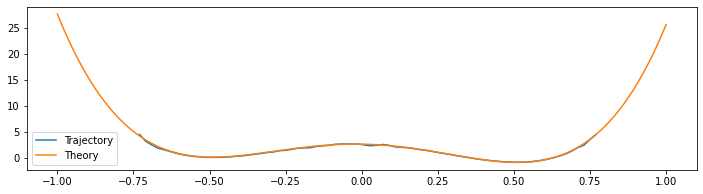

In [24]:
Fx_traj = -KbT*np.log(px)
Fx_theo = -KbT*np.log(Px_serie)

plt.figure(figsize=[12,3])
plt.plot(x_center_bin, Fx_traj.in_units_of(unit.kilocalories_per_mole), label='Trajectory')
plt.plot(x_serie, Fx_theo.in_units_of(unit.kilocalories_per_mole), label='Theory')
plt.legend()
plt.show()

Puedes ver que en este caso la energía libre es igual a la energía potencial en $X$ más una constante:

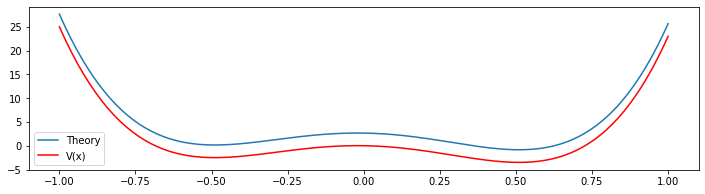

In [25]:
plt.figure(figsize=[12,3])
plt.plot(x_serie, Fx_theo.in_units_of(unit.kilocalories_per_mole), label='Theory')
plt.plot(xyz_serie[:,0], potential, 'r-', label='V(x)')
plt.legend()
plt.show()

¿Cúal es el valor de esa constante?¿Será siempre la energía libre similar a la energía potencial? Como veremos en las siguientes unidades: no. Únicamente podemos pensar en esos términos cuando la temperatura del sistema sea cero o cuando los estados o microestados sobre los que definimos nuestro paisaje de energía libre sean igualmente entrópicos o tengan el mismo volumen conformacional.

## Ya podemos calcular el valor esperado de los observables que no dependen del tiempo

Comienza a tener sentido el primer párrafo de esta unidad. Conocida la termodinámica del sistema podemos predecir el valor de cualquier observable, el resultado de cualquier experimento, que no dependa del tiempo. El valor esperado de un observable $O(\vec{r},\vec{v})$, que es función de las posiciones y las velocidades del sistema, puede ser calculado como:

\begin{align}
<O> &= \iiint_{-\infty}^{\infty} \iiint_{-\infty}^{\infty} O(\vec{r},\vec{v}) P(\vec{r},\vec{v}) d\vec{r} \; d\vec{v} = \\
    &= \frac{1}{Z} \iiint_{-\infty}^{\infty} \iiint_{-\infty}^{\infty} O(\vec{r},\vec{v}) e^{-\frac{1}{K_{B}T} U(\vec{r},\vec{v})} d\vec{r} \; d\vec{v}
\end{align}

Por ejemplo, calculemos la posición promedio o el valor esperado de la posición en el eje $X$ de nuestro sistema:

\begin{equation}
<x> = \int_{-\infty}^{\infty} x P(x)dx = \frac{1}{Z_{V_{x}}} \int_{-\infty}^{\infty} x e^{-\frac{1}{K_{B}T}V_{x}(x)} dx
\end{equation}
    
Dado que la forma del potencial en $X$ es analíticamente no tan sencilla como para que la integral la podamos resolver de manera inmediata, hagámoslo numéricamente:

In [26]:
def xPx (x):
    
    global Eo, a, b, k, KbT
    
    x_aux = x/a
    Vx =  Eo * (x_aux**4 - 2*x_aux**2) - b*x_aux

    return x*np.exp(-Vx/KbT)
 
int_xPx = integral_numerica_1D(xPx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)
ZVx = integral_numerica_1D(zVx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)

mean_x_theo = int_xPx/ZVx

print(mean_x_theo)

0.32844060676847203 nm


Veamos cómo se compara el valor promedio de la partícula a lo largo de la simulación con el valor teórico calculado:

In [27]:
print(np.mean(traj_x))

0.31244210056025234 nm


Efectivamente nuestra trayectoria de 1000 ns era lo sucientemente larga como para medir el promedio de la posición en $X$ con bastante precisión.

Calculemos ahora la energía potencial promedio de la partícula en el eje $Y$:

\begin{equation}
<V_{y}> = \int_{-\infty}^{\infty} \frac{1}{2}ky^{2} P(y)dy = \frac{k}{2Z_{V_{y}}} \int_{-\infty}^{\infty} y^{2} e^{-\frac{k}{2K_{B}T} y^{2}} dy = \frac{k}{2} \frac{\int_{-\infty}^{\infty} y^{2} e^{-\frac{k}{2K_{B}T} y^{2}} dy}{\int_{-\infty}^{\infty} e^{-\frac{k}{2K_{B}T} y ^2} dy}
\end{equation}

En esta ocasión sí conocemos la solución analítica de ambas integrales. De hecho son muy populares, se trata de la integral Gaussiana y del segundo momento central de la función Gaussiana:

\begin{equation}
\int_{-\infty}^{\infty} e^{-ax^{2}} dx = \sqrt{\frac{\pi}{a}}
\end{equation}

\begin{equation}
\int_{-\infty}^{\infty} x^{2} e^{-ax^{2}} dx = \frac{1}{2a} \sqrt{\frac{\pi}{a}}
\end{equation}

Así que:

\begin{equation}
<V_{y}> = \frac{1}{2} K_{B}T
\end{equation}

Este resultado es algo que es útil. La energía promedio de un oscilador armónico unidimensional es $\frac{1}{2}K_{B}T$. Veamos qué sucede con la energía potencial promedio para el doble pozo:

In [28]:
def VxPx (x):
    
    global Eo, a, b, k, KbT
    
    x_aux = x/a
    Vx =  Eo * (x_aux**4 - 2*x_aux**2) - b*x_aux

    return Vx*np.exp(-Vx/KbT)
 
int_VxPx = integral_numerica_1D(VxPx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)
ZVx = integral_numerica_1D(zVx, -1.0*unit.nanometer, 1.0*unit.nanometer, 1000)

mean_Vx_theo = int_VxPx/ZVx

print(mean_Vx_theo)

-3.0035593577624846 kcal/mol


Puedes checar que en este caso la energía potencial promedio ya no es $\frac{1}{2}K_{B}T$: 

In [29]:
KbT.in_units_of(unit.kilocalories_per_mole)

Quantity(value=0.5961612775922495, unit=kilocalorie/mole)

Por último, puedes comprobar que la energía cinética de la partícula en cualquiera de las dimensiones es igual a la de un oscilador armónico:

\begin{equation}
<T_{v_{x}}> = \int_{-\infty}^{\infty} \frac{1}{2}mv_{x}^{2} P(v_{x})dv_{x} = \frac{m}{2Z_{T_{V_{x}}}} \int_{-\infty}^{\infty} v_{x}^{2} e^{-\frac{m}{2K_{B}T} v_{x}^{2}} dv_{x} = \frac{1}{2} K_{B}T
\end{equation}

Este resultado también es para recordar. La energía cinética de una partícula es $3/2 K_{B}T$. Un medio de $K_{B}T$ por cada grado de libertad.

Nota: ¿Depende el valor de la posición promedio, o el de la constante de disociación, o la energía cinética o potential promedio, de la masa de la partícula? ¿Afecta la masa de la partícula, o de las partículas si nuestro sistema tuviera más de una, a la termodinámica de nuestro sistema? ¿Dependen las probabilidades de los estados definidos en el espacio de coordenadas de las masas de las partículas de nuestro sistema? Sin embargo, si vamos a estudiar el comportamiento del sistema mediante su dinámica, la masa si afecta a los movimientos más rápidos que podemos encontrar: afecta al periodo de las posibles pequeñas oscilaciones al rededor de los mínimos. Si incrementamos la masa de la partícula, incrementamos el periodo de oscilación, y por lo tanto podemos aumentar el paso de integración para poder simular el sistema computacionalmente con menos costo sin comprometer la precisión y estabilidad del integrador de la dinámica. Este truco suele emplearse en la dinámica molecular de sistemas moleculares. Se llama repartición de la masa de los átomos de hidrógeno. Aumentamos la masa de los hidrógenos a costa de rebajar la masa de los átomos pesados enlazados covalentemente. De esta manera conservamos la masa total del sistema pero aumentamos el periodo característico de oscilación de los movimientos más rápidos, la fluctuación de los enlaces covalentes con átomos de hidrógeno. Entenderás ahora que este truco es válido para incrementar el paso de integración sin afectar a la termodinámica del sistema. Cualquier valor esperado de un observable que no dependa del tiempo no se verá afectado por este ardid. No podemos decir lo mismo de la cinética, puede que esta se vea afectada.

Para terminar, repitamos quizá el mensaje más importante de esta unidad: la probabilidad de que los observables tomen un cierto valor depende de las energías potenciales y cinéticas de los estados del sistema compatibles con dicho valor del observable. Es por eso que hablamos de termodinámica cuando nos referimos a medidas y observables de magnitudes del equilibrio, que no dependen del tiempo.

Te aconsejamos que leas el primer párrafo de esta unidad para que compruebas que lo que probablemente no tenía sentido en una primera lectura, ya lo tiene.